# D2TEC: Tecnologia de Big Data 2022 (IFSP, Campinas)
Profa. Bianca Pedrosa <br>
email: bpedrosa@ifsp.edu.br

**Trabalho 1 - ETL de dados usando ferramentas analíticas da AWS**

Outubro de 2022

Aluno: Swift Motoo Yaguchi (CP301665X)


Creative Commons License
This work is licensed under a Creative Commons Attribution<br> NonCommercial-ShareAlike 4.0 International License.

**1. Introducao**<br>
Este trabalho apresenta um estudo de ETL (Extrair, transformar e carregar) de dados usando a plataforma AWS segundo o objetivo de Implementação de um ETL/pipeline de dados, na AWS e utilizar a linguagem SQL para fazer analise dos dados.


**2. Detalhes dos Dados**<br> 
O banco de dados escolhido foi extraído do conjunto de dados do Portal de Dados Abertos do TSE onde sao disponibilizados a sociedade dados gerados ou custodiados pelo TSE, de forma a garantir o acesso a informações e aprimorar a cultura de transparência. <br>
Este portal substitui o antigo Repositório de Dados Eleitorais, descontinuado em janeiro de 2022, e está em constante atualização segundo minha observação. <br>
Segundo o próprio site do TSE, os dados lá disponíveis podem ser livremente acessados, utilizados, modificados e compartilhados por qualquer pessoa, com vistas à geração de novas informações e iniciativas da sociedade que busquem estimular o controle social e contribuir com a melhoria da gestão pública. <br>
(https://dadosabertos.tse.jus.br/) <br><br>
O portal contém uma enormidade de dados relativos às eleições brasileiras como resultados detalhados de votação das últimas eleições, pesquisas eleitorais, prestação de contas dos candidatos, perfil de eleitores, assim como dados antigos como candidatos de eleições antigas desde o ano de 1933. <br><br>
Especificamente para este trabalho foram selecionados os seguinte dados referentes ao primeiro turno da eleição corrente de 2022:
- Resultados de votação por município e por zona (830.299KB zip) https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource/40fdcf49-256a-4c81-87cf-711545bd1528 
- Resultados de votação por seção eleitoral no Estado de São Paulo (253.206KB zip) https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource/5c375ecc-9c40-4c75-921c-686a920c150a
- Perfil dos candidatos (5.986KB zip) https://dadosabertos.tse.jus.br/dataset/candidatos-2022/resource/435145fd-bc9d-446a-ac9d-273f585a0bb9
- Perfil dos eleitores (31.119KB zip) https://dadosabertos.tse.jus.br/dataset/eleitorado-2022/resource/8a6ff7bd-5a22-4d1a-9353-cce06f9f5e35 <br><br>

A partir dos dados acima foi feito um trabalho de seleção e limpeza de dados para cada um dos arquivos acima:
- limitando os dados dentro dos eleitores do município de Campinas
- convertendo a codificação de caracteres dos arquivs de dados de "Latin 1" para "UTF-8"

A ideia de limitar os dados aos eleitores de Campinas foi para tentar visualizar o comportamento dos eleitores numa eleição nacional e estadual, que é diferente de uma eleição municipal.<br>
Convém registrar que não foram considerados votação para presidente, mas sim todos os demais cargos, governador, senador, deputado federal e deputado estadual.



**3. Infraestrutura**

Foi utlizada a infraestrutura do AWS Learner's Lab:
- AWSAccountId	887118459548
- Região	us-east-1 (Leste dos EUA - Norte da Virgínia)

Visão geral do bucket:
- Região da AWS : Leste dos EUA (Norte da Virgínia) us-east-1
- Nome de recurso da Amazon (ARN): arn:aws:s3:::syaguchi-aws-ifspcps-bucket
- Data de criação: 11 Oct 2022 04:10:42 PM -03

Nome do AWS Glue Crawler utilizado para este trabalho:
- tse_eleicao_2022
<br><br>

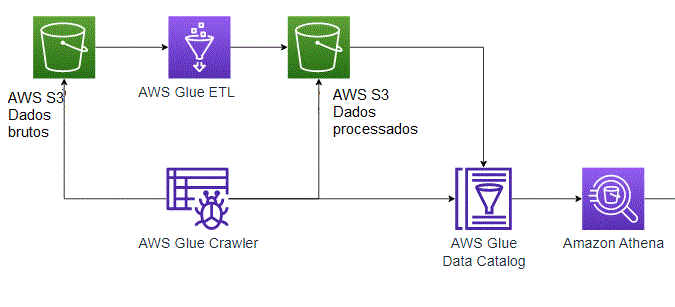

O diagrama mostra o fluxo utilizado neste trabalho:<br>
1. Dados brutos foram carregados num AWS "S3 bucket" <br>
url: s3://syaguchi-aws-ifspcps-bucket/raw_data_3/ <br>
https://s3.console.aws.amazon.com/s3/buckets/syaguchi-aws-ifspcps-bucket?region=us-east-1&prefix=raw_data_3/&showversions=false <br>
2. "AWS Glue" faz o processamento ETL dos dados brutos através do "Glue Crawler" <br>
3. Dados processados são armazenados no "S3 bucket" gerando o "AWS Glue Catalog" <br>
https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/databases/view/eleicao_2022?catalogId=887118459548 <br>
4. Dados processados na forma de tabelas são então utilizados pelo "Amazon Athena" para fazer as "queries SQL".




**4. Metadados**

Os dados para este trabalho estão em 4 sub-pastas da pasta "raw_data_3" criado no "bucket S3": 
- s3://syaguchi-aws-ifspcps-bucket/raw_data_3/
https://s3.console.aws.amazon.com/s3/buckets/syaguchi-aws-ifspcps-bucket?region=us-east-1&prefix=raw_data_3/&showversions=false <br>

Seguem os schemas de cada uma das tabelas utilizadas neste trabalho.<br>
As tabelas são independentes apesar de ter muitas colunas de dados em comum.
- detalhe_votacao_secao_2022_sp <br>
https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/tables/view/detalhe_votacao_secao_2022_sp?database=eleicao_2022&catalogId=887118459548&versionId=latest
- votacao_candidato_munzona_2022_sp <br>
https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/tables/view/votacao_candidato_munzona_2022_sp?database=eleicao_2022&catalogId=887118459548&versionId=latest
- perfil_eleitorado_2022 <br>
https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/tables/view/perfil_eleitorado_2022?database=eleicao_2022&catalogId=887118459548&versionId=latest
- consulta_cand_2022_sp <br>
https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/tables/view/consulta_cand_2022_sp?database=eleicao_2022&catalogId=887118459548&versionId=latest



**5. SQL Queries adn views**
Diversas formas de queries e views foram exercitados, dentre os quais os mais relevantes foram salvos em minha área no AWS Athenas: <br>
https://us-east-1.console.aws.amazon.com/athena/home?region=us-east-1#/query-editor/saved-queries <br>
A seguir cada uma delas é apresentada e comentada.


***5.1 consulta grau_escolaridade eleitores de campinas***

SQL Query:
- SELECT ds_grau_escolaridade, nr_zona, SUM(qt_eleitores_perfil) 
- FROM perfil_eleitorado_2022 
- GROUP BY (ds_grau_escolaridade, nr_zona) 
- ORDER BY SUM(qt_eleitores_perfil) DESC;<br><br>

É uma consulta com agregação e ordenação.<br><br>
Resultado: 
- perfil de grau de escolaridade mais numerosos pelas zonas eleitorais:<br>
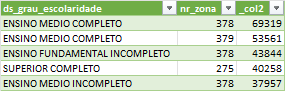

- perfil de grau de escolaridade menos numerosos pelas zonas eleitorais:<br>
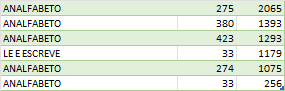
<br><br>

Numa rápida observação dos resultados desta query podemos perceber:
- a grande maioria dos eleitores de Campinas tem ensino médio completo distribuidos por todas as zonas eleitorais.<br><br>

Confirmamos que:
- zonas eleitorais com eleitores de maior poder aquisitivo tem maior número de eleitores com grau de escoaridade superior completo
- zonas eleitorais com eleitores de menor poder aquisitivo tem maior número de eleitores com grau de escoaridade superior completo








***5.2 consulta_candidatos_nascidos_ em_campinas***

SQL Query:
- SELECT nm_urna_candidato, sg_partido, ds_cargo, ds_ocupacao, nr_idade_data_posse
- FROM consulta_cand_2022_sp
- WHERE nm_municipio_nascimento = 'CAMPINAS'
- ORDER BY ds_ocupacao ASC

É uma consulta com funções e ordenação.<br><br>
Resultado:
- perfil de ocupação dos candidatos nascidos em Campinas:<br>
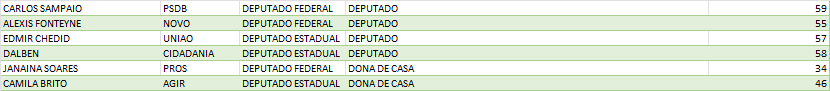<br>

Numa rápida observação dos resultados desta query podemos perceber e confirmar:
- a grande quantidade de políticos candidatando para reeleição ou mudança de cargos políticos
- uma minoria de candidatos não políticos, como dona de casa, mas que requer uma análise mais profunda se não são candidatos para cumprir cotas obrigatórias



***5.3 consulta candidatos mais votado***

SQL Query:
- SELECT nm_urna_candidato, nr_zona, SUM(qt_votos_nominais)
- FROM votacao_candidato_munzona_2022_sp
- GROUP BY (nm_urna_candidato, nr_zona)
- ORDER BY SUM(qt_votos_nominais) DESC


É uma consulta com agregação e ordenação, simples, porém com muita informação para avaliação<br><br>
Resultado:
- candidatos maivotados, por eleitores da cidade de Campinas:<br>
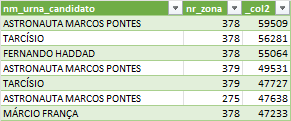
<br><br>

Numa rápida observação dos resultados desta query podemos perceber:

- o candidato que recebeu maior votação não é representante ligado à cidade de Campinas, nem atuado com resultados em prol de interesses para melhoria da ciência e tecnologia em Campinas como um todo
- recebeu maior votação em todas as zonas eleitorais tanto as de melhor padrão de vida como mais carentes   
- os candidatos representantes da cidade de Campinas só aparecem a partir do 25º lugar em número de votos por zonas eleitorais 

Confirmamos que:
- a imagem de experiência como astronauta parece ter sido o motivador da maior votação
- há de se considerar que nenhum candidato a senador pelo Estado de São Paulo tem atuação na cidade de Campinas
- os eleitores de Campinas não votam nos candidiatos de Campinas


***5.4 consulta maiores abstenções em Campinas***

SQL Query:
- SELECT nr_zona, nr_secao, SUM(qt_abstencoes)
- FROM detalhe_votacao_secao_2022_sp
- WHERE nm_municipio = 'CAMPINAS'
- GROUP BY (nr_zona, nr_secao)
- ORDER BY SUM(qt_abstencoes) DESC


É uma consulta com agregação, função e ordenação, também simples, porém com informação para avaliação<br><br>
Resultado:<br>
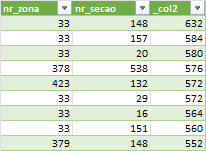
<br><br>
Numa rápida observação dos resultados desta query podemos perceber:

- as maiores abstenções são em zonas eleitorias e seções de regiões de menor poder aquisitivo e no centro, indicando talvez o desinteresse de busca de mudanças atarvés do voto...



***5.5 consulta votos nulos por secao e por cargo***

SQL Query:
- SELECT nr_zona, nr_secao, ds_cargo, qt_votos_nulos, qt_votos_brancos, qt_votos_nominais, qt_votos_legenda
- FROM detalhe_votacao_secao_2022_sp
- WHERE nm_municipio = 'CAMPINAS'
- GROUP BY (nr_zona, nr_secao, ds_cargo, qt_votos_nulos, qt_votos_brancos, qt_votos_nominais, qt_votos_legenda)
- ORDER BY qt_votos_nulos DESC


É uma consulta com agregação e ordenação, simples, porém com muita informação para avaliação<br><br>
Resultado:<br>
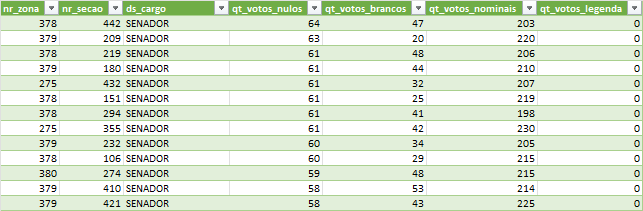 <br><br>

Numa rápida observação dos resultados desta query podemos perceber:

- a maior quantidade de votos nulos pelos eleitores de Campinas foi para o cargo de senador, indicando que uma boa parcela dos eleitores de Campinas não tinha definição firme de candidiato a senador
<br>
É interessante observar que, em conjunto com a query anterior onde observamos maior quantidade de votos para o candidato astronauta a senador, parece que podemos avaliar que os eleitores de Campinas não tinham candididato a senador, e que muitos escolheram pela imagem...

***5.6 consulta_inner_join_candidito_mais_votado_em_campinas***

SQL Query:
- select consulta_cand_2022_sp.nm_urna_candidato, consulta_cand_2022_sp.ds_cargo, consulta_cand_2022_sp.ds_grau_instrucao, consulta_cand_2022_sp.ds_ocupacao, SUM(votacao_candidato_munzona_2022_sp.qt_votos_nominais)
- from consulta_cand_2022_sp inner join votacao_candidato_munzona_2022_sp 
on consulta_cand_2022_sp.nm_urna_candidato = votacao_candidato_munzona_2022_sp.nm_urna_candidato
- WHERE consulta_cand_2022_sp.nm_municipio_nascimento = 'CAMPINAS'
- GROUP BY (consulta_cand_2022_sp.nm_urna_candidato, consulta_cand_2022_sp.ds_cargo, consulta_cand_2022_sp.ds_grau_instrucao, consulta_cand_2022_sp.ds_ocupacao)
- ORDER BY SUM(votacao_candidato_munzona_2022_sp.qt_votos_nominais) DESC


É uma consulta utilizando junção de duas tabelas com colunas de dados complementares para uma melhor análise, focado em candidatos nascidos em campinas<br><br>
Resultado:<br>
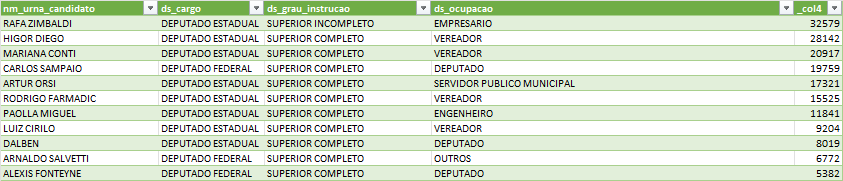 <br><br>

Numa rápida observação dos resultados desta query podemos perceber:

- os eleitores de Campinas reelegeram alguns poucos candidiatos, indicando que estes candidatos devem ter resultados para Campinas
- os eleitores de Campinas não ajudaram alguns candidatos que não foram reeleitos indicando que eles não apresentaram resultados para Campinas
- os eleitores de Campinas parecem indicar buscar renovação votando em candidatos novos que tem mostrado potencial para crescer 




***5.7 consulta_inner_join_candidito_mais_votado_em_campinas***

SQL Query:
- select consulta_cand_2022_sp.nm_candidato, consulta_cand_2022_sp.ds_cargo, consulta_cand_2022_sp.ds_grau_instrucao, consulta_cand_2022_sp.ds_ocupacao, SUM(votacao_candidato_munzona_2022_sp.qt_votos_nominais)
- from consulta_cand_2022_sp inner join votacao_candidato_munzona_2022_sp 
on consulta_cand_2022_sp.nm_candidato = votacao_candidato_munzona_2022_sp.nm_candidato
- WHERE votacao_candidato_munzona_2022_sp.nm_municipio = 'CAMPINAS'
- GROUP BY (consulta_cand_2022_sp.nm_candidato, consulta_cand_2022_sp.ds_cargo, consulta_cand_2022_sp.ds_grau_instrucao, consulta_cand_2022_sp.ds_ocupacao)
- ORDER BY SUM(votacao_candidato_munzona_2022_sp.qt_votos_nominais) DESC


É uma consulta utilizando junção de duas tabelas com colunas de dados complementares para uma melhor análise, desta vez focado em candidatos fora de Campinas também<br><br>
Resultado:<br>
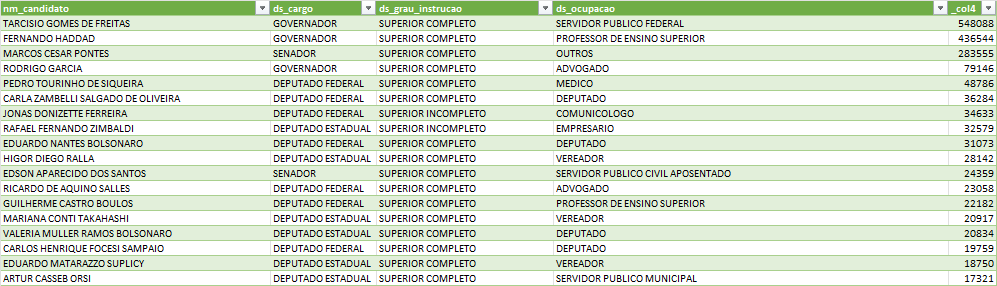
<br><br>

Numa rápida observação dos resultados desta query podemos perceber:

- os eleitores de Campinas não votam preferencialmente em candidatos de Campinas
- uma grande parte dos votos são perdidos em candidatos sem potencial e com poucos votos, tornando os candidiatos eleitos não representativos da maioria dos eleitores

***5.8 consulta votos nominais dos candidatos por zona com total de votos do candidato por PARTITION em campinas***

SQL Query:
- SELECT  nm_municipio, nm_urna_candidato, sg_partido, nr_zona, ds_cargo, qt_votos_nominais, SUM(qt_votos_nominais) OVER(PARTITION BY nm_urna_candidato) AS Total_de_votos_nominais_do_candidato
- FROM votacao_candidato_munzona_2022_sp
- WHERE qt_votos_nominais > 5000 AND ds_cargo IN ('Deputado Estadual', 'Deputado Federal')
- ORDER BY qt_votos_nominais DESC;


É uma consulta utilizando partition para análise para avaliar candidatos mais votads por zonas eleitorais, e o total de votos obtido pelo mesmo candidato em Campinas.<br><br>
Resultado:<br>
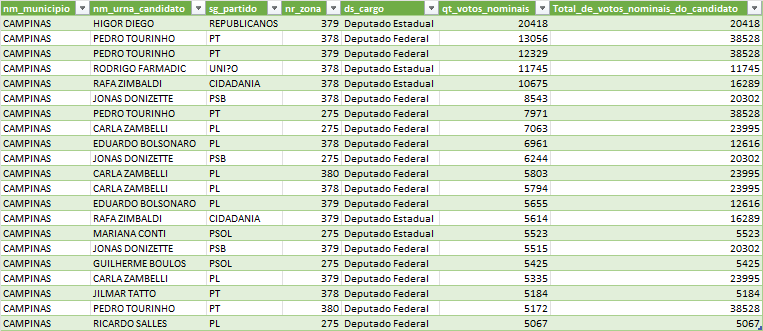 <br><br>

Numa rápida observação dos resultados desta query podemos perceber:

- alguns candidatos, principalmente de Campinas, receberam votos de eleitores de Campinas concentrados numa única zona eleitoral, que deve ser a sua área de atuação.
- já candidatos fora de Campinas parecem ter recebido votos distribuidos pela diversas zonas eleitorais sem concentarção aparente.

***5.9 consulta rank() candidatos por idade***

SQL Query:
- SELECT  nm_urna_candidato, sg_partido, nm_municipio_nascimento, ds_grau_instrucao, ds_estado_civil, ds_cor_raca, ds_ocupacao,nr_idade_data_posse,
- RANK() OVER(ORDER BY nr_idade_data_posse DESC) Rank
- FROM consulta_cand_2022_sp
- WHERE nm_municipio_nascimento = 'CAMPINAS'

É uma consulta utilizando rank() para análise de candidatos mais idosos  em Campinas.<br><br>
Resultado:<br>
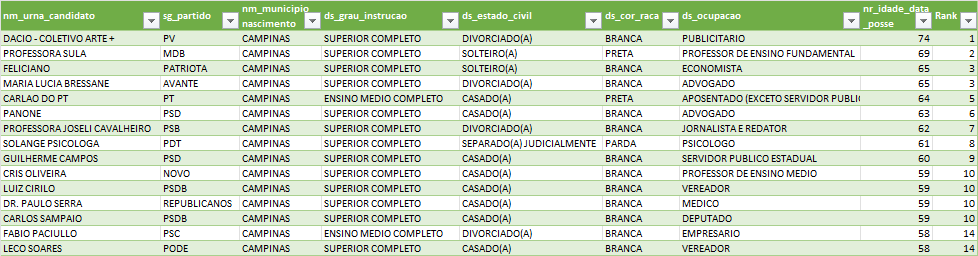 <br><br>

Numa rápida observação dos resultados desta query podemos perceber:

- candidatos de mais de 50 anos de idade são em sua maioria casados(as) e brancos(as)
- já para candidatos de menos de 40 anos de idade observa-se um aumento de diverciados(as) e pretos(as) e pardos(as)



***5.10 consulta_inner_join_idade_voto_candidiatos_de_campinas***

SQL Query:
- select consulta_cand_2022_sp.nm_urna_candidato, consulta_cand_2022_sp.sg_partido, consulta_cand_2022_sp.ds_cargo, consulta_cand_2022_sp.nr_idade_data_posse, SUM(votacao_candidato_munzona_2022_sp.qt_votos_nominais)
- from consulta_cand_2022_sp inner join votacao_candidato_munzona_2022_sp 
- on consulta_cand_2022_sp.nm_urna_candidato = votacao_candidato_munzona_2022_sp.nm_urna_candidato
- WHERE consulta_cand_2022_sp.nm_municipio_nascimento = 'CAMPINAS'
- GROUP BY (consulta_cand_2022_sp.nm_urna_candidato,  consulta_cand_2022_sp.sg_partido, consulta_cand_2022_sp.ds_cargo, consulta_cand_2022_sp.nr_idade_data_posse)
- ORDER BY consulta_cand_2022_sp.nr_idade_data_posse DESC


É uma consulta utilizando junção para análise de candidatos mais idosos  em Campinas e seus votos recebidos.<br><br>
Resultado:<br>
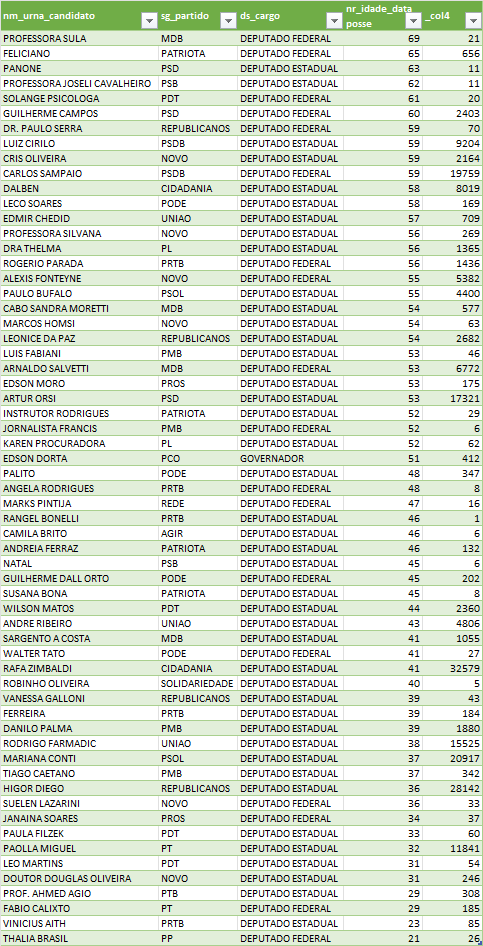 <br><br>

Numa rápida observação dos resultados desta query podemos perceber:

- há vários candidatos de mais de 50 anos de idade sem Campinas mas poucos receberam boas votações
- já nota-se que vários candidiatos com idade abaixo de 40 anos receberam boas votações, o que talvez mostrea expectativa do eleitores de Campinas por renovação dos políticos
 

***5.11 view candidatos e votos nominais***

SQL View:
- CREATE VIEW view1 AS    
- SELECT nm_urna_candidato, sg_partido, ds_cargo, nr_zona, qt_votos_nominais
- FROM votacao_candidato_munzona_2022_sp

É uma view prática para consulta de um candidato e a votação recebida nesta última eleição. <br>

A consulta é feita pela query:
- SELECT SUM(qt_votos_nominais)
- FROM view_candidatos_votosnominais
- WHERE nm_urna_candidato = 'HIGOR DIEGO'

Resultado:<br>
**28142**


***5.12 view_perfil_eleitores***

SQL View:
- CREATE VIEW View_perfil_eleitores AS
- SELECT nm_municipio, nr_zona, ds_grau_escolaridade, ds_genero, ds_estado_civil, ds_faixa_etaria, qt_eleitores_perfil
- FROM perfil_eleitorado_2022


É uma view prática para consulta do número de eleitores com um grau de escolaridade em Campinas<br>

A consulta é feita pela query:
- SELECT COUNT(ds_grau_escolaridade)
- FROM view_perfil_eleitores
- WHERE ds_grau_escolaridade = 'ANALFABETO'

Resultado:<br>
**815**

***5.13 view_qt_votos_por_secao***

SQL View:
- CREATE OR REPLACE VIEW "view_qt_votos_nominais_por_secao" AS 
- SELECT
  nm_municipio
, nr_zona
, nr_secao
, qt_votos_nominais
, qt_votos_brancos
, qt_votos_nulos
- FROM detalhe_votacao_secao_2022_sp



É uma view prática para consulta do número de votos nominais de uma seção eleitoral em Campinas<br>

A consulta é feita pela query:
- SELECT SUM(qt_votos_brancos)
- FROM view_qt_votos_por_secao
- WHERE nr_zona=380 and nr_secao=66

Resultado:<br>
**60**

**Notas de fechamento do trabalho**

Considerando que eu não tinha conhecimento prático anterior em operação na numvem AWS e em operação com SQL, este trabalho foi muito válido para mim para adquirir um domínio nestas operações.<br>
Ainda há muito a aprender e este trabalho pode ser melhorado.<br><br>
Foi desafiador buscar a base de dados do TSE para este aprendizado e como resultado espero que este trabalho sirva para dar conhecimento das características de uma eleição em alguns detalhes não apresentados pela mídia.<br><br>
As minhas observações foram simples, e talvez possa servir como base de análise e reflexões para um próximo trabalho.<br><br>
As observações refletem opiniões pessoais minhas apenas, e sou todo ouvidos para feedbacks e correções eventuais.